In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ema_workbench as ema

In [51]:
df = pd.read_csv("Prepared Data/500_experiments_results.csv")

In [52]:
df[[10,11,12]]

,Flood damage (Milj. Euro),Number of casualties,Costs
0,20392,821.924880,70.00
1,10182,370.869170,70.00
2,19627,512.941700,70.00
3,8806,149.819890,70.00
4,43822,1165.277450,70.00
5,33917,1258.973730,70.00
6,21155,674.091100,70.00
7,44453,805.183380,70.00
8,35930,1475.090400,70.00
9,18069,335.754400,70.00


In [53]:
costs = np.array(df[[10,11,12]])

In [54]:
def is_pareto_efficient_dumb(costs):
    """
    :param costs: An (n_points, n_costs) array
    :return: A (n_points, ) boolean array, indicating whether each point is Pareto efficient
    """
    is_efficient = np.ones(costs.shape[0], dtype = bool)
    for i, c in enumerate(costs):
        is_efficient[i] = np.all(np.any(costs>=c, axis=1))
    return is_efficient

In [55]:
a = is_pareto_efficient_dumb(costs)

In [56]:
sum(a)

1345

These policies are non-dominated:

In [57]:
df4 =df[a]

In [58]:
df4['policy'].unique()

array(['Dike 1:500 +0.5m', 'Dike 1:500 extr.', 'Dike 1:1000',
       'Dike 1:1000 extr.', 'Dike 2nd Q x 1.5', 'Coop Small',
       'Alarm Early', 'no policy', 'Alarm Education'], dtype=object)

In [59]:



# """"
# Dike 1:500 +0.5m
# Dike 1:500 extr.
# Dike 1:1000
# Dike 1:1000 extr.
# Dike 2nd Q x 1.5
# """"

## plot policies and scenarios

In [60]:
import seaborn as sns


In [61]:
df3 = df[a][['policy','climate scenarios']]

In [62]:
df3['policy']

2030     Dike 1:500 +0.5m
2112     Dike 1:500 +0.5m
2139     Dike 1:500 +0.5m
2149     Dike 1:500 +0.5m
2153     Dike 1:500 +0.5m
2167     Dike 1:500 +0.5m
2170     Dike 1:500 +0.5m
2176     Dike 1:500 +0.5m
2185     Dike 1:500 +0.5m
2237     Dike 1:500 +0.5m
2260     Dike 1:500 +0.5m
2268     Dike 1:500 +0.5m
2274     Dike 1:500 +0.5m
2285     Dike 1:500 +0.5m
2290     Dike 1:500 +0.5m
2302     Dike 1:500 +0.5m
2315     Dike 1:500 +0.5m
2354     Dike 1:500 +0.5m
2370     Dike 1:500 +0.5m
2393     Dike 1:500 +0.5m
2402     Dike 1:500 +0.5m
2425     Dike 1:500 +0.5m
2434     Dike 1:500 +0.5m
2478     Dike 1:500 +0.5m
2489     Dike 1:500 +0.5m
2500     Dike 1:500 extr.
2501     Dike 1:500 extr.
2502     Dike 1:500 extr.
2506     Dike 1:500 extr.
2508     Dike 1:500 extr.
               ...       
10032     Alarm Education
10067     Alarm Education
10112     Alarm Education
10117     Alarm Education
10124     Alarm Education
10171     Alarm Education
10172     Alarm Education
10184     Al

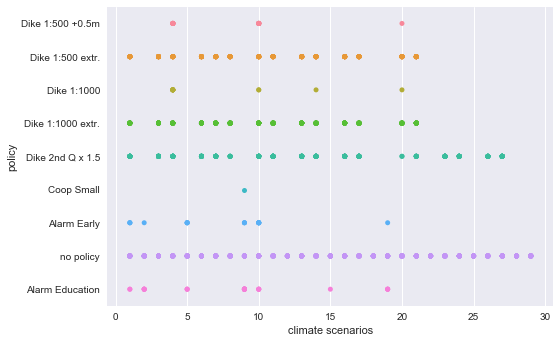

In [63]:
sns.stripplot(y='policy',x='climate scenarios',data=df3)

plt.show()

## find non-dominated for all scenarios 

In [64]:
for x in df[a]['policy'].unique():
    print(x)

Dike 1:500 +0.5m
Dike 1:500 extr.
Dike 1:1000
Dike 1:1000 extr.
Dike 2nd Q x 1.5
Coop Small
Alarm Early
no policy
Alarm Education


In [65]:
b = df[a]['climate scenarios'].unique()
b.sort()
b

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], dtype=int64)

In [66]:
for i in range (31):
    if i not in b:
        print(i)

0
30


In [67]:
costs = np.array(df[[11,12]])

In [68]:
a = is_pareto_efficient_dumb(costs)

In [69]:
b = []
b.extend(df[a].index.values)

# find all pareto solutions for each scenario

In [70]:
df.columns

Index(['DamFunctTbl_multiplier', 'ShipTbl1', 'ShipTbl2', 'ShipTbl3',
       'climate scenarios', 'collaboration', 'fragility dikes',
       'land use scenarios', 'model', 'policy', 'Flood damage (Milj. Euro)',
       'Number of casualties', 'Costs'],
      dtype='object')

In [71]:
df['Costs_cum'] = df[['Costs','Flood damage (Milj. Euro)']].sum(axis=1)

In [72]:
# df[[11,13]]

In [73]:
non_dominated_indexs = []
for clim_scen in sorted(df['climate scenarios'].unique()):
    scenario = df[df['climate scenarios'] == clim_scen]
    objectives = np.array(scenario[[11,13]])
    a = is_pareto_efficient_dumb(objectives)
    non_dominated_indexs.extend(scenario[a].index.values)

In [74]:
df2 = df.ix[non_dominated_indexs]

In [75]:
len(df2)

848

In [76]:
df3 = df2[['policy','climate scenarios']]

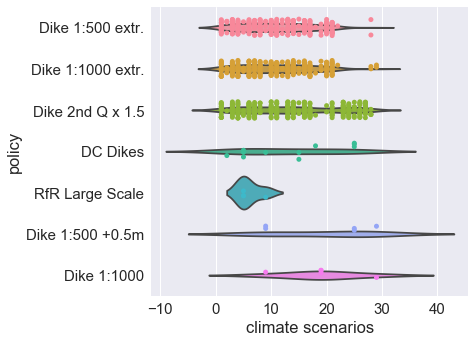

In [77]:
# figure = plt.figure(figsize=(10,20))
# sns.set_context("poster")
sns.set(font_scale=1.5, style="darkgrid")

# sns.despine()
# sns.set_style({'grid.color': '.9'})
sns.stripplot(y='policy',x='climate scenarios',data=df3,jitter = 0.2)
sns.violinplot(y='policy',x='climate scenarios',data=df3, inner=None)
plt.gcf().subplots_adjust(bottom=0.15, left=0.35)
# plt.savefig("policies_for_scenarios_grey",dpi = 400)
plt.show()

In [88]:
df2

,DamFunctTbl_multiplier,ShipTbl1,ShipTbl2,ShipTbl3,climate scenarios,collaboration,fragility dikes,land use scenarios,model,policy,Flood damage (Milj. Euro),Number of casualties,Costs,Costs_cum
2513,0.092877,-0.073985,0.078871,0.099173,1,1.174243,-0.071283,urbanizationLargeAndFast,waasmodel,Dike 1:500 extr.,0,0.0000,174.722060,174.722060
2532,-0.001277,0.037470,-0.029945,0.068206,1,1.395633,-0.098261,Deurbanization,waasmodel,Dike 1:500 extr.,0,0.0000,174.722060,174.722060
2551,0.050890,-0.079305,-0.069748,0.033578,1,1.214654,-0.002520,sustainableGrowth,waasmodel,Dike 1:500 extr.,0,0.0000,174.722060,174.722060
2567,0.088763,-0.082954,0.004862,0.002029,1,1.177648,-0.093026,Deurbanization,waasmodel,Dike 1:500 extr.,0,0.0000,174.722060,174.722060
2581,0.033050,-0.065094,-0.036922,-0.078084,1,1.468712,0.082639,urbanizationLargeAndFast,waasmodel,Dike 1:500 extr.,0,0.0000,174.722060,174.722060
2595,-0.035325,-0.087073,0.055705,-0.007673,1,1.398250,-0.027977,sustainableGrowth,waasmodel,Dike 1:500 extr.,0,0.0000,174.722060,174.722060
2611,-0.051271,-0.010218,-0.065465,0.009691,1,1.170379,0.054497,urbanizationDeurbanization,waasmodel,Dike 1:500 extr.,0,0.0000,174.722060,174.722060
2620,-0.003460,-0.081695,-0.079042,-0.033220,1,1.447055,0.006586,urbanizationLargeSteady,waasmodel,Dike 1:500 extr.,0,0.0000,174.722060,174.722060
2622,-0.039332,0.016181,-0.043544,0.073672,1,1.461418,0.032061,sustainableGrowth,waasmodel,Dike 1:500 extr.,0,0.0000,174.722060,174.722060
2692,0.064957,-0.001505,0.042631,0.063211,1,1.460588,-0.069159,Deurbanization,waasmodel,Dike 1:500 extr.,0,0.0000,174.722060,174.722060


In [107]:
policylist =[]
costs =[]
kills =[]
economic = []
for policy in df2['policy'].unique():
    #print(policy,': Costs:' ,df2[df2['policy']==policy]['Costs_cum'].mean(),'---- kills:', df2[df2['policy']==policy]['Number of casualties'].mean())
    policylist.append(policy)
    costs.append(df2[df2['policy']==policy]['Costs'].mean())
    kills.append(df2[df2['policy']==policy]['Number of casualties'].mean())
    economic.append(df2[df2['policy']==policy]['Flood damage (Milj. Euro)'].mean())

In [108]:
score = pd.DataFrame(data ={'Policy': policylist, 'Costs': costs, 'Casualties':kills, 'Flood Damage':economic })

In [110]:
score = score[['Policy','Costs','Casualties', 'Flood Damage']]
score

,Policy,Costs,Casualties,Flood Damage
0,Dike 1:500 extr.,174.722060,5.837594,57.981203
1,Dike 1:1000 extr.,252.841350,5.542642,56.328302
2,Dike 2nd Q x 1.5,221.414497,5.359955,53.708904
3,DC Dikes,600.000000,30.966420,4931.818182
4,RfR Large Scale,269.000000,62.668693,1631.500000
5,Dike 1:500 +0.5m,164.147603,44.399980,3716.800000
6,Dike 1:1000,184.677809,16.845500,2600.800000


In [105]:
print(score['Costs'].mean())
print(score['Kills'].mean())

2130.8199871628517
24.517254736079046


In [111]:
score.to_excel('Scorecard2.xlsx')

In [91]:
for policy in df2['policy'].unique():
    print(policy,':' ,df2[df2['policy']==policy]['Number of casualties'].mean())

Dike 1:500 extr. : 5.837593984962406
Dike 1:1000 extr. : 5.542641509433962
Dike 2nd Q x 1.5 : 5.359954794520549
DC Dikes : 30.966420363636363
RfR Large Scale : 62.668692500000006
Dike 1:500 +0.5m : 44.399980000000006
Dike 1:1000 : 16.8455
